In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving unique_m.csv to unique_m.csv


In [7]:
# Store the data into a variable

dataSet1 = pd.read_csv('train.csv')
dataSet2 = pd.read_csv('unique_m.csv').drop(['critical_temp','material'], axis = 1)

dataFrame = pd.concat([dataSet1, dataSet2], axis = 1)

dataFrame.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355.183884,160.25,105.100000,136.126003,84.371352,1.259244,1.173033,205,46.114286,75.237540,68.521665,4654.35725,2980.330857,724.953211,53.758486,1.033129,0.788889,8958.571,1623.483429,3306.162897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,775.425,1009.717143,718.152900,937.025573,1.305967,0.805230,810.6,728.807143,323.811808,356.319281,160.25,106.342857,136.126003,84.843442,1.259244,1.261194,205,36.514286,75.237540,70.634448,4654.35725,2923.845143,724.953211,53.117029,1.033129,0.859811,8958.571,1491.783429,3306.162897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [10]:
# Removing any mutually correlated features

correlationMatrix = dataFrame.corr()
correlationFeatures = set()

for i in range(len(correlationMatrix)):
  for j in range(i):
    if abs(correlationMatrix.iloc[i,j]) > 0.75:
      colname = correlationMatrix.columns[i]
      if colname != "critical_temp":
        correlationFeatures.add(colname)
dataFrame.drop(correlationFeatures, axis =1, inplace = True)
dataFrame.shape



(21263, 108)

In [14]:
# Remove features with low variance

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
selector.fit(dataFrame)
dataFrame = pd.DataFrame(selector.transform(dataFrame), columns = dataFrame.columns[selector.get_support()])
dataFrame.shape

(21263, 63)

In [17]:
dataFrame.to_csv('CleanData.csv')

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df = pd.read_csv('CleanData.csv')
x =  df.drop('critical_temp',axis = 1)
x_scale = sc.fit_transform(x)
x = pd.DataFrame(x_scale, columns = x.columns)
y = df['critical_temp']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

# Change the number of trees here and see how the model reacts to it
forest = RandomForestRegressor(n_estimators =200, max_features = 'auto')
forest.fit(x_train, y_train)

y_prediction = pd.Series(forest.predict(x_test))

min_rmse = round(np.sqrt(mean_squared_error(y_test,y_prediction)),4)
r2 = r2_score(y_prediction,y_test)

print(r2)
print(min_rmse)

0.9245240554433592
8.9674


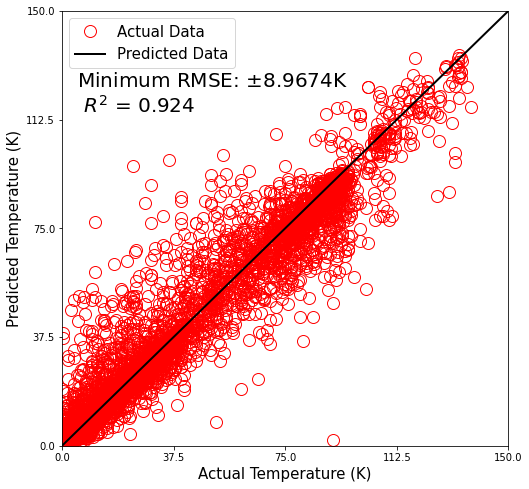

In [27]:
plt.figure(1, figsize=(8,8))
plt.plot(y_test, y_prediction, 'ro', markersize=12, mfc='none')
plt.plot([0,150],[0,150],'k', linewidth = 2)
plt.xlabel('Actual Temperature (K)', fontsize = 15)
plt.ylabel('Predicted Temperature (K)', fontsize = 15)
plt.xlim((0,150))
plt.ylim((0,150))
ticks = np.linspace(0,150,5)
text = r'$\pm'+str(8.9674)+'$'+'K \n $R^2$ = 0.924'
plt.text(5,115,'Minimum RMSE: '+text, fontsize = 20)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['Actual Data', 'Predicted Data'], loc='best', fontsize=15)